In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyreadstat

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from itertools import combinations
import itertools


## Iterations from feature 1 to feature end

In [3]:
csfbiomk1_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\CSF_Biomarker1\csfbiomk1_20231117.csv"
csfbiomk1 = pd.read_csv(csfbiomk1_file_path)
csfbiomk1 = pd.DataFrame(csfbiomk1)

# right_volume_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Volumetric_Analysis\rh_aparc_volume_20231117.csv"
# right_volume = pd.read_csv(right_volume_file_path)
# right_volume = pd.DataFrame(right_volume)


In [4]:
csfbiomk1.head()


,subject_id,visit,checkin_bin,exposurebin,age_decade,racecat_combined,eduyears,totyr_foot,chiiseas_pf,chiiyrs_pf,...,c_pT181,c_tTau_FLAG_below_ref_range,c_FLAG_hemolysis,c_tTau_FLAG_insufficient,c_ttau,c_NfL,c_GFAP,c_pT231,c_pT217,dxcte_ptau217_csf_flag_dv
0,1001,1,2,1,1,5,16.0,7.0,4335.4,2167.7,...,24.4,0.0,0.0,0.0,598.0,373.96,8706.69,487.34,0.6059,1.0
1,1002,1,2,1,1,5,15.0,14.0,10363.1,5708.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1003,1,2,1,1,5,18.0,12.0,6685.4,4863.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1004,1,1,1,2,5,16.0,16.0,7701.2,6448.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1005,1,3,0,2,5,21.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print("Column Names:")
print(csfbiomk1.columns[2])

Column Names:
checkin_bin


In [6]:
#group them base on the value in the third column which indicates their level of playing
csfbiomk1_grouped = csfbiomk1.groupby(csfbiomk1.iloc[:, 2])

NFL_csfbiomk1_grouped = pd.DataFrame()
CP_csfbiomk1_grouped = pd.DataFrame()
HC_csfbiomk1_grouped = pd.DataFrame()


# group_name : 1, 2, 3   group_data: 
for group_name, group_data in csfbiomk1_grouped:
    if group_name == 1:
        NFL_csfbiomk1_grouped = pd.concat([NFL_csfbiomk1_grouped,group_data], ignore_index = True)
    if group_name == 2:
        CP_csfbiomk1_grouped = pd.concat([CP_csfbiomk1_grouped,group_data], ignore_index = True)
    if group_name == 3:
        HC_csfbiomk1_grouped = pd.concat([HC_csfbiomk1_grouped,group_data], ignore_index = True)
    
#print("DataFrame for NFL:")
#print(NFL_right_grouped.head())
NFL_csfbiomk1_grouped.head()


,subject_id,visit,checkin_bin,exposurebin,age_decade,racecat_combined,eduyears,totyr_foot,chiiseas_pf,chiiyrs_pf,...,c_pT181,c_tTau_FLAG_below_ref_range,c_FLAG_hemolysis,c_tTau_FLAG_insufficient,c_ttau,c_NfL,c_GFAP,c_pT231,c_pT217,dxcte_ptau217_csf_flag_dv
0,1004,1,1,1,2,5,16.0,16.0,7701.2,6448.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1008,1,1,1,2,3,15.0,22.0,8220.9,5421.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9774,1.0
2,1011,1,1,1,2,5,16.0,20.0,9307.0,9307.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1015,1,1,1,1,3,19.0,17.0,9866.7,6173.3,...,24.0,0.0,0.0,0.0,174.0,472.76,NaN,NaN,NaN,3.0
4,1018,1,1,1,1,3,16.0,23.0,10635.9,7929.6,...,20.5,0.0,0.0,0.0,202.0,336.18,7297.61,316.56,2.0394,1.0


In [7]:
index_of_chiiyrs_pg = NFL_csfbiomk1_grouped.columns.get_loc("chiiyrs_pg")
NFL_csfbiomk1_grouped.drop(columns=NFL_csfbiomk1_grouped.columns[[1] +list(range(3,index_of_chiiyrs_pg+1))], inplace = True)
CP_csfbiomk1_grouped.drop(columns=CP_csfbiomk1_grouped.columns[[1] +list(range(3,index_of_chiiyrs_pg+1))], inplace = True)
HC_csfbiomk1_grouped.drop(columns=HC_csfbiomk1_grouped.columns[[1] +list(range(3,index_of_chiiyrs_pg+1))], inplace = True)

NFL_csfbiomk1_grouped.head()


,subject_id,checkin_bin,c_strem2_FLAG_insufficient,c_PDGFRbeta_FLAG_insufficient,c_strem2,c_PDGFRbeta,c_Ab40,c_Ab42,c_pT181,c_tTau_FLAG_below_ref_range,c_FLAG_hemolysis,c_tTau_FLAG_insufficient,c_ttau,c_NfL,c_GFAP,c_pT231,c_pT217,dxcte_ptau217_csf_flag_dv
0,1004,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1008,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9774,1.0
2,1011,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1015,1,0.0,0.0,1446.0,333.0,6889.0,670.0,24.0,0.0,0.0,0.0,174.0,472.76,NaN,NaN,NaN,3.0
4,1018,1,0.0,0.0,1563.0,209.0,5360.0,463.0,20.5,0.0,0.0,0.0,202.0,336.18,7297.61,316.56,2.0394,1.0


In [8]:
#combine all three classes
combined_csfbiomk1 = pd.concat([NFL_csfbiomk1_grouped, CP_csfbiomk1_grouped, HC_csfbiomk1_grouped], ignore_index=True)

combined_csfbiomk1.head()

,subject_id,checkin_bin,c_strem2_FLAG_insufficient,c_PDGFRbeta_FLAG_insufficient,c_strem2,c_PDGFRbeta,c_Ab40,c_Ab42,c_pT181,c_tTau_FLAG_below_ref_range,c_FLAG_hemolysis,c_tTau_FLAG_insufficient,c_ttau,c_NfL,c_GFAP,c_pT231,c_pT217,dxcte_ptau217_csf_flag_dv
0,1004,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1008,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9774,1.0
2,1011,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1015,1,0.0,0.0,1446.0,333.0,6889.0,670.0,24.0,0.0,0.0,0.0,174.0,472.76,NaN,NaN,NaN,3.0
4,1018,1,0.0,0.0,1563.0,209.0,5360.0,463.0,20.5,0.0,0.0,0.0,202.0,336.18,7297.61,316.56,2.0394,1.0


In [9]:
# Remove NaNs
print("Size before:", combined_csfbiomk1.shape)
combined_csfbiomk1.dropna(inplace=True)
print("Size after:", combined_csfbiomk1.shape)

Size before: (236, 18)
Size after: (148, 18)


In [10]:
# Separate based on the level of professionalism
X = combined_csfbiomk1.drop(columns=['subject_id','checkin_bin']) 
y = combined_csfbiomk1['checkin_bin']

In [11]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train =pd.DataFrame(X_train_scaled,columns= X.columns)
X_test = pd.DataFrame(X_test_scaled, columns= X.columns)

In [14]:
# RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# number of features
num_features = X_train.shape[1]

# store evaluation metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []



In [15]:
X_train

,c_strem2_FLAG_insufficient,c_PDGFRbeta_FLAG_insufficient,c_strem2,c_PDGFRbeta,c_Ab40,c_Ab42,c_pT181,c_tTau_FLAG_below_ref_range,c_FLAG_hemolysis,c_tTau_FLAG_insufficient,c_ttau,c_NfL,c_GFAP,c_pT231,c_pT217,dxcte_ptau217_csf_flag_dv
0,0.0,0.0,0.585577,0.528348,0.795373,0.512882,0.498929,0.0,0.0,0.0,0.216231,0.165590,0.395550,0.339472,0.242980,0.0
1,0.0,0.0,0.146530,0.248151,0.207093,0.384058,0.155246,0.0,0.0,0.0,0.063181,0.047563,0.131353,0.189327,0.323271,0.0
2,0.0,0.0,0.129211,0.151191,0.352005,0.483897,0.080300,0.0,0.0,0.0,0.019608,0.053052,0.050751,0.163244,0.096032,0.0
3,0.0,0.0,0.569882,1.000000,0.354530,0.262480,0.521413,0.0,0.0,0.0,1.000000,1.000000,0.046725,0.500472,0.697587,0.0
4,0.0,0.0,0.487755,0.195563,0.420938,0.370370,0.383298,0.0,0.0,0.0,0.168845,0.151866,0.280262,0.479164,0.433991,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0.0,0.0,0.452172,0.258833,0.227761,0.000000,0.347966,0.0,0.0,0.0,0.094771,0.290540,0.417178,0.621793,0.454920,0.0
114,0.0,0.0,0.175754,0.094495,0.209618,0.205314,0.036403,0.0,0.0,0.0,0.185185,0.082717,0.115582,0.089315,0.011616,1.0
115,0.0,0.0,0.381275,0.248151,0.535494,0.640097,0.296574,0.0,0.0,0.0,0.099673,0.082278,0.841427,0.509770,0.134265,0.0
116,0.0,0.0,0.163577,0.207067,0.476601,0.609501,0.141328,0.0,0.0,0.0,0.076797,0.161198,0.260092,0.287608,0.050476,0.0


In [53]:

# Iterate over increasing numbers of features
for i in range(1, num_features + 1):
    # Select the first i features
    selected_features = X_train.iloc[:, :i] 
    model.fit(selected_features, y_train) #train
    selected_features_test = X_test.iloc[:, :i] #predictions
    y_pred = model.predict(selected_features_test)

    # defining metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = 'weighted')
    recall = recall_score(y_test, y_pred, average = 'weighted')
    f1 = f1_score(y_test, y_pred, average = 'weighted')

    # Append metrics to lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

C:\Users\fargor\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fargor\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1]:
# Plots
plt.plot(range(1, num_features + 1), accuracy_list, label='Accuracy')
plt.plot(range(1, num_features + 1), precision_list, label='Precision')
plt.plot(range(1, num_features + 1), recall_list, label='Recall')
plt.plot(range(1, num_features + 1), f1_list, label='F1 Score')

plt.xlabel('Number of Features')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [63]:
print(precision_list.index(max(precision_list)))
print(accuracy_list.index(max(accuracy_list)))
print(recall_list.index(max(recall_list)))
print(f1_list.index(max(f1_list)))

2
0
0
15


In [65]:
#(recall_list)

[0.6,
 0.6,
 0.23333333333333334,
 0.3333333333333333,
 0.36666666666666664,
 0.4666666666666667,
 0.3333333333333333,
 0.3333333333333333,
 0.36666666666666664,
 0.4,
 0.4,
 0.4,
 0.43333333333333335,
 0.4666666666666667,
 0.4666666666666667,
 0.5]

In [67]:
# top N maximum values
top_n = 3  
max_precision_indices = np.argsort(precision_list)[-top_n:][::-1]
max_accuracy_indices = np.argsort(accuracy_list)[-top_n:][::-1]
max_recall_indices = np.argsort(recall_list)[-top_n:][::-1]
max_f1_indices = np.argsort(f1_list)[-top_n:][::-1]

top_precision_values = np.partition(precision_list, -top_n)[-top_n:]
top_accuracy_values = np.partition(accuracy_list, -top_n)[-top_n:]
top_recall_values = np.partition(recall_list, -top_n)[-top_n:]
top_f1_values = np.partition(f1_list, -top_n)[-top_n:]

print("Top", top_n, "Indices for Maximum Precision:", max_precision_indices, "and their values:", top_precision_values)
print("Top", top_n, "Indices for Maximum Accuracy:", max_accuracy_indices, "and their values:", top_accuracy_values)
print("Top", top_n, "Indices for Maximum Recall:", max_recall_indices, "and their values:", top_recall_values)
print("Top", top_n, "Indices for Maximum F1 Score:", max_f1_indices, "and their values:", top_f1_values)


Top 3 Indices for Maximum Precision: [ 2 15 14] and their values: [0.49341737 0.50294118 0.53333333]
Top 3 Indices for Maximum Accuracy: [ 1  0 15] and their values: [0.5 0.6 0.6]
Top 3 Indices for Maximum Recall: [ 1  0 15] and their values: [0.5 0.6 0.6]
Top 3 Indices for Maximum F1 Score: [15 14 13] and their values: [0.46348039 0.47832723 0.50063492]


In [68]:
print( precision_list [3], accuracy_list [3], recall_list [3], f1_list [3])

0.4287037037037037 0.3333333333333333 0.3333333333333333 0.34352548036758557


# Various Combinations of 7 Features


In [69]:
X

,c_strem2_FLAG_insufficient,c_PDGFRbeta_FLAG_insufficient,c_strem2,c_PDGFRbeta,c_Ab40,c_Ab42,c_pT181,c_tTau_FLAG_below_ref_range,c_FLAG_hemolysis,c_tTau_FLAG_insufficient,c_ttau,c_NfL,c_GFAP,c_pT231,c_pT217,dxcte_ptau217_csf_flag_dv
4,0.0,0.0,1563.0,209.0,5360.0,463.0,20.5,0.0,0.0,0.0,202.0,336.18,7297.61,316.56,2.0394,1.0
5,0.0,0.0,3328.0,967.0,21115.0,1500.0,104.2,0.0,0.0,0.0,828.0,600.31,12695.85,1218.89,5.2955,1.0
6,0.0,0.0,1595.0,358.0,9435.0,898.0,29.4,0.0,0.0,0.0,222.0,452.69,1504.20,492.71,1.3735,1.0
8,0.0,0.0,2646.0,569.0,15812.0,1332.0,74.0,0.0,0.0,0.0,630.0,747.93,12874.13,1169.94,6.9061,1.0
11,0.0,0.0,4210.0,385.0,11253.0,805.0,54.3,0.0,0.0,0.0,464.0,787.93,11141.23,820.31,3.1215,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0.0,0.0,3542.0,326.0,15091.0,1334.0,43.0,0.0,0.0,0.0,666.0,494.19,37557.64,264.46,0.6599,1.0
230,0.0,0.0,5186.0,666.0,18824.0,1729.0,45.5,0.0,0.0,0.0,344.0,1269.51,11173.94,665.11,1.5771,1.0
231,0.0,0.0,2572.0,337.0,9591.0,774.0,26.8,0.0,0.0,0.0,423.0,1327.53,12512.14,429.11,0.7688,1.0
232,0.0,0.0,2661.0,422.0,10694.0,1022.0,34.0,0.0,0.0,0.0,266.0,325.68,4061.21,482.88,0.8114,1.0


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train =pd.DataFrame(X_train_scaled,columns= X.columns)
X_test = pd.DataFrame(X_test_scaled, columns= X.columns)


# RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# number of features
num_features = X_train.shape[1]

# store evaluation metrics
selected_features_list = []

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []



In [74]:
X_train.head()

,c_strem2_FLAG_insufficient,c_PDGFRbeta_FLAG_insufficient,c_strem2,c_PDGFRbeta,c_Ab40,c_Ab42,c_pT181,c_tTau_FLAG_below_ref_range,c_FLAG_hemolysis,c_tTau_FLAG_insufficient,c_ttau,c_NfL,c_GFAP,c_pT231,c_pT217,dxcte_ptau217_csf_flag_dv
0,0.0,0.0,0.585577,0.528348,0.795373,0.512882,0.498929,0.0,0.0,0.0,0.216231,0.165590,0.395550,0.339472,0.242980,0.0
1,0.0,0.0,0.146530,0.248151,0.207093,0.384058,0.155246,0.0,0.0,0.0,0.063181,0.047563,0.131353,0.189327,0.323271,0.0
2,0.0,0.0,0.129211,0.151191,0.352005,0.483897,0.080300,0.0,0.0,0.0,0.019608,0.053052,0.050751,0.163244,0.096032,0.0
3,0.0,0.0,0.569882,1.000000,0.354530,0.262480,0.521413,0.0,0.0,0.0,1.000000,1.000000,0.046725,0.500472,0.697587,0.0
4,0.0,0.0,0.487755,0.195563,0.420938,0.370370,0.383298,0.0,0.0,0.0,0.168845,0.151866,0.280262,0.479164,0.433991,0.0


In [77]:
# Iterate over all combinations of 30 features
for combo in itertools.combinations(range(num_features), 6):
    # Select the current combination of features
    selected_features = X_train.iloc[:, list(combo)]

    # Train the model
    model.fit(selected_features, y_train)

    # Make predictions on the test set
    selected_features_test = X_test.iloc[:, list(combo)]
    y_pred = model.predict(selected_features_test)

    # Evaluate the model's precision
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = 'weighted')
    recall = recall_score(y_test, y_pred, average = 'weighted')
    f1 = f1_score(y_test, y_pred, average = 'weighted')

    # Check if precision is greater than or equal to 0.64
    if precision >= 0.5:
        # Store the selected features and corresponding precision
        selected_features_list.append(list(combo))
        precision_list.append(precision)
        accuracy_list.append(accuracy)
        recall_list.append(recall)
        f1_list.append(f1)

C:\Users\fargor\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fargor\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fargor\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fargor\AppData\Local\anaconda3\lib\site-

C:\Users\fargor\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fargor\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fargor\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fargor\AppData\Local\anaconda3\lib\site-

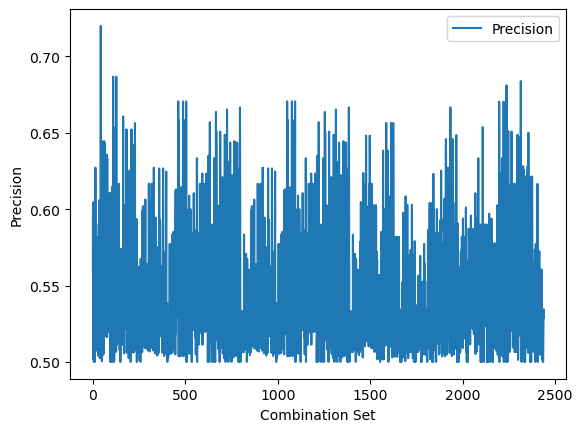

0.7199346405228758

In [78]:

# Plot the precisions
plt.plot(precision_list, label='Precision')
plt.xlabel('Combination Set')
plt.ylabel('Precision')
plt.legend()
plt.show()
max(precision_list)

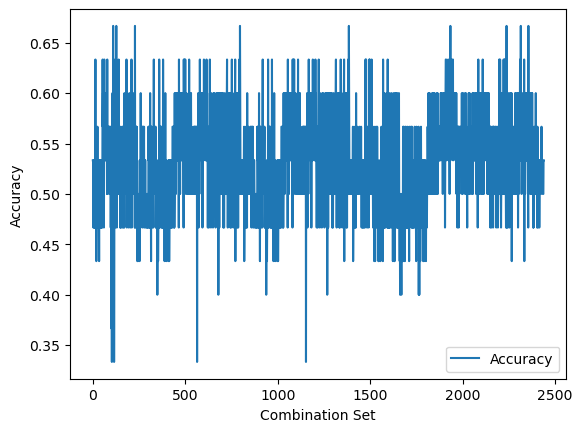

0.6666666666666666

In [79]:
# Plot the Accuracy
plt.plot(accuracy_list, label='Accuracy')
plt.xlabel('Combination Set')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
max(accuracy_list)


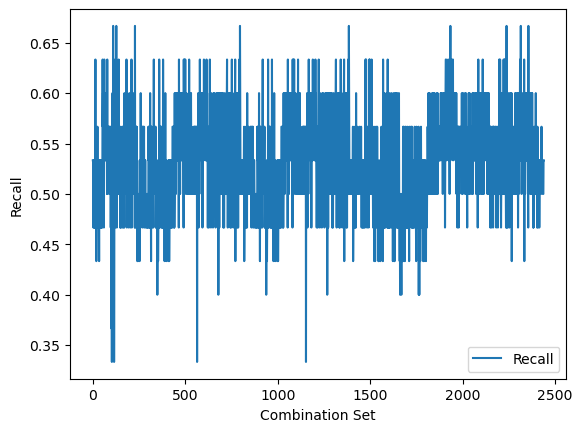

0.6666666666666666

In [84]:
# Plot the Recall
plt.plot(recall_list, label='Recall')
plt.xlabel('Combination Set')
plt.ylabel('Recall')
plt.legend()
plt.show()
max(recall_list)

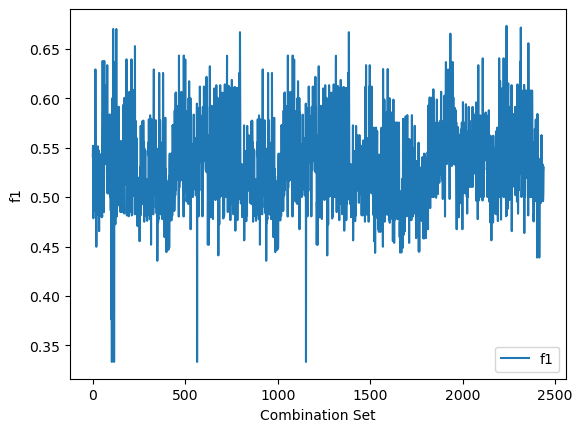

0.6729870129870129

In [81]:
# Plot the f1
plt.plot(f1_list, label='f1')
plt.xlabel('Combination Set')
plt.ylabel('f1')
plt.legend()
plt.show()
max(f1_list)

In [82]:
max_precision_index = precision_list.index(max(precision_list))
best_combination_set = selected_features_list[max_precision_index]

print("Best Combination Set:", best_combination_set)
print("Max Precision:", max(precision_list))

Best Combination Set: [0, 1, 2, 8, 11, 15]
Max Precision: 0.7199346405228758


In [83]:
X.iloc[0,best_combination_set]

c_strem2_FLAG_insufficient          0.00
c_PDGFRbeta_FLAG_insufficient       0.00
c_strem2                         1563.00
c_FLAG_hemolysis                    0.00
c_NfL                             336.18
dxcte_ptau217_csf_flag_dv           1.00
Name: 4, dtype: float64

## Try Bagging 

In [91]:
# TryingX and y of the training and testing dataset to make sure they are fine
#y_test

In [92]:
num_features

16

C:\Users\fargor\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\fargor\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fargor\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\fargor\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

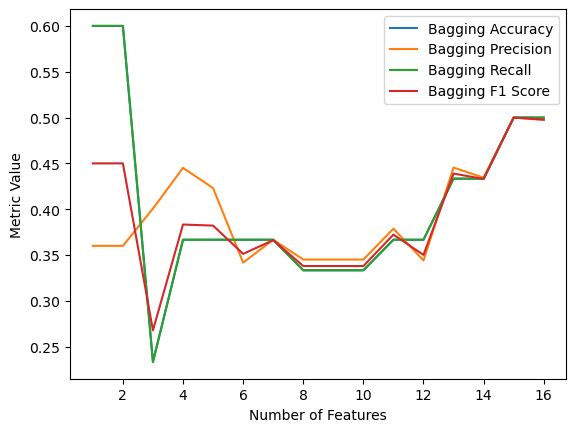

In [93]:
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100, random_state=42),
                                  n_estimators=10, random_state=42)

# store evaluation metrics
bagging_accuracy_list = []
bagging_precision_list = []
bagging_recall_list = []
bagging_f1_list = []

# increasing numbers of features
for i in range(1, num_features + 1):
    selected_features = X_train.iloc[:, :i] 
    
    bagging_model.fit(selected_features, y_train)
    
    selected_features_test = X_test.iloc[:, :i]
    y_pred_bagging = bagging_model.predict(selected_features_test)

    accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
    precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
    recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
    f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

    bagging_accuracy_list.append(accuracy_bagging)
    bagging_precision_list.append(precision_bagging)
    bagging_recall_list.append(recall_bagging)
    bagging_f1_list.append(f1_bagging)

# Plotting
plt.plot(range(1, num_features + 1), bagging_accuracy_list, label='Bagging Accuracy')
plt.plot(range(1, num_features + 1), bagging_precision_list, label='Bagging Precision')
plt.plot(range(1, num_features + 1), bagging_recall_list, label='Bagging Recall')
plt.plot(range(1, num_features + 1), bagging_f1_list, label='Bagging F1 Score')

plt.xlabel('Number of Features')
plt.ylabel('Metric Value')
plt.legend()
plt.show()


In [97]:
!pip3 install xgboost

import xgboost as xgb


## Try XGBoost

In [101]:
from xgboost import XGBClassifier


In [109]:
#y_train
# Check if they are normalized
# X_train

,c_strem2_FLAG_insufficient,c_PDGFRbeta_FLAG_insufficient,c_strem2,c_PDGFRbeta,c_Ab40,c_Ab42,c_pT181,c_tTau_FLAG_below_ref_range,c_FLAG_hemolysis,c_tTau_FLAG_insufficient,c_ttau,c_NfL,c_GFAP,c_pT231,c_pT217,dxcte_ptau217_csf_flag_dv
0,0.0,0.0,0.585577,0.528348,0.795373,0.512882,0.498929,0.0,0.0,0.0,0.216231,0.165590,0.395550,0.339472,0.242980,0.0
1,0.0,0.0,0.146530,0.248151,0.207093,0.384058,0.155246,0.0,0.0,0.0,0.063181,0.047563,0.131353,0.189327,0.323271,0.0
2,0.0,0.0,0.129211,0.151191,0.352005,0.483897,0.080300,0.0,0.0,0.0,0.019608,0.053052,0.050751,0.163244,0.096032,0.0
3,0.0,0.0,0.569882,1.000000,0.354530,0.262480,0.521413,0.0,0.0,0.0,1.000000,1.000000,0.046725,0.500472,0.697587,0.0
4,0.0,0.0,0.487755,0.195563,0.420938,0.370370,0.383298,0.0,0.0,0.0,0.168845,0.151866,0.280262,0.479164,0.433991,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0.0,0.0,0.452172,0.258833,0.227761,0.000000,0.347966,0.0,0.0,0.0,0.094771,0.290540,0.417178,0.621793,0.454920,0.0
114,0.0,0.0,0.175754,0.094495,0.209618,0.205314,0.036403,0.0,0.0,0.0,0.185185,0.082717,0.115582,0.089315,0.011616,1.0
115,0.0,0.0,0.381275,0.248151,0.535494,0.640097,0.296574,0.0,0.0,0.0,0.099673,0.082278,0.841427,0.509770,0.134265,0.0
116,0.0,0.0,0.163577,0.207067,0.476601,0.609501,0.141328,0.0,0.0,0.0,0.076797,0.161198,0.260092,0.287608,0.050476,0.0


In [118]:
X = combined_csfbiomk1.drop(columns=['subject_id','checkin_bin']) 
y = combined_csfbiomk1['checkin_bin']

In [119]:
y

4      1
5      1
6      1
8      1
11     1
      ..
229    3
230    3
231    3
232    3
235    3
Name: checkin_bin, Length: 148, dtype: int64

In [120]:
# Since for XGBoost, the y values should start at 0, you need to do some justification
y = y-1

In [121]:
y

4      0
5      0
6      0
8      0
11     0
      ..
229    2
230    2
231    2
232    2
235    2
Name: checkin_bin, Length: 148, dtype: int64

In [122]:
# Do the splitting again to make sure that this adjustemnt is applied to your new X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train =pd.DataFrame(X_train_scaled,columns= X.columns)
X_test = pd.DataFrame(X_test_scaled, columns= X.columns)

In [123]:
y_test

201    2
85     0
225    2
34     0
169    1
20     0
118    0
57     0
131    1
16     0
50     0
159    1
230    2
105    0
217    2
103    0
33     0
107    0
198    2
56     0
54     0
170    1
64     0
192    2
91     0
40     0
101    0
211    2
132    1
18     0
Name: checkin_bin, dtype: int64

C:\Users\fargor\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fargor\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


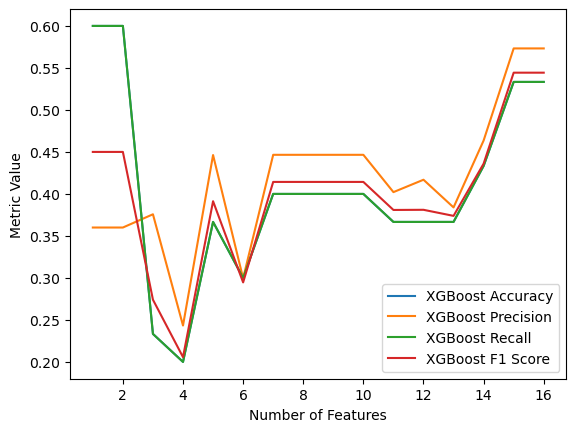

In [124]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, random_state=42)

xgb_accuracy_list = []
xgb_precision_list = []
xgb_recall_list = []
xgb_f1_list = []

# increasing numbers of features
for i in range(1, num_features + 1):
    selected_features = X_train.iloc[:, :i] 
    
    xgb_model.fit(selected_features, y_train)
    
    selected_features_test = X_test.iloc[:, :i]
    y_pred_xgb = xgb_model.predict(selected_features_test)

    accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
    precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
    recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
    f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

    xgb_accuracy_list.append(accuracy_xgb)
    xgb_precision_list.append(precision_xgb)
    xgb_recall_list.append(recall_xgb)
    xgb_f1_list.append(f1_xgb)

# Plottig
plt.plot(range(1, num_features + 1), xgb_accuracy_list, label='XGBoost Accuracy')
plt.plot(range(1, num_features + 1), xgb_precision_list, label='XGBoost Precision')
plt.plot(range(1, num_features + 1), xgb_recall_list, label='XGBoost Recall')
plt.plot(range(1, num_features + 1), xgb_f1_list, label='XGBoost F1 Score')

plt.xlabel('Number of Features')
plt.ylabel('Metric Value')
plt.legend()
plt.show()


In [ ]:
y_pred2  = best_model.predict(X_train_scaled)

accuracy_train = accuracy_score(y_train, y_pred2)
precision_bagging = precision_score(y_train, y_pred2, average='weighted')
recall_bagging = recall_score(y_train, y_pred2, average='weighted')
f1_bagging = f1_score(y_train, y_pred2, average='weighted')

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, f1:{f1}")
# print(f"Accuracy: {accuracy}")
